In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
#import progressbar

Este proyecto consiste en simular la evolución de una pandemia considerando las siguientes características: 

- El contagio depende de la proximidad a un infectado y de la probabilidad de contagio 
- Los infectados pueden infectar zonas que tienen probabilidad de contagio
- Los casos con síntomas se aislarán después de un tiempo $T_{crit}$
- El movimiento de los individuos viene dado por una caminata aleatoria en 2D. Sin embargo, también existen nodos a los que es mas probable que los individuos se dirijan
- Despues de un tiempo $T_{crit}$ Los individuos guardarán cierta distancia
- El aeropuerto es un nodo por el cual pueden llegar y salir infectados y no infectados, sin embargo este nodo se cierra en tiempo  $T_{crit}$

# Clase ciudades

Esta clase tendrá asignados los valores de tamaño, esto es, las fronteras sobre las cuales los individuos se pueden mover, la cantidad de nodos iniciales que tendrá (este valor no puede ser menor a 1) la población la cual va a ir cambiando siempre que el aeropuerto esté abierto y la susceptibilidad de viaje que es un valor entre 0 y 2, un valor menor a uno representa que la población es susceptible a inmigrar y un valor mayor a 1 representa que la población es susceptible a emigrar

In [10]:
class ciudades:
    def __init__(self,x0,y0,nodes0,pop0,sus0):
        self.x=x0
        self.y=y0
        self.nodes=nodes0
        self.pob=pop0
        self.sus=sus0
    def givedata(self):
        city={ "size":[(self.x,self.y)],"nodos":[self.nodes],"poblacion":[self.pob],"susceptibilidad":[self.sus]}
        df=pd.DataFrame(city)
        return df,city
    def givesize(self):
        return self.x,self.y
    

In [11]:
def generate(N):
    #cities=pd.DataFrame(columns = ["size","nodos","poblacion","susceptibilidad"])
    cities=[]
    for i in range(N):
        newx,newy=np.random.randint(400,800),np.random.randint(400,800)
        populate=int(np.random.uniform(0.7,2)*(newx*newy)/40)
        nnodes=int((populate/200))
        vsus=np.random.normal(1,0.005)
        name="city" + str(i)
        newcity=ciudades(newx,newy,nnodes,populate,vsus)
        cities.append(newcity.givedata()[0])
        #print(newcity.givedata())
    ret=pd.concat(cities,ignore_index=True)
    return ret
    
        
            
        
        

In [12]:
generate(20)

,size,nodos,poblacion,susceptibilidad
0,"(502, 596)",58,11624,1.018410
1,"(602, 762)",96,19352,1.003191
2,"(492, 404)",26,5349,0.999792
3,"(565, 576)",40,8166,0.996223
4,"(521, 679)",62,12472,1.001583
5,"(558, 593)",40,8176,1.005872
6,"(475, 571)",40,8116,1.004518
7,"(686, 764)",62,12598,1.001093
8,"(573, 405)",49,9896,1.003515
9,"(771, 463)",45,9150,0.997761


In [13]:
class persona:
    def __init__(self,ciudad0,x0,y0,nodosasociados0,infec0,condclinicas0):
        self.ciudad=ciudad0
        self.x=x0
        self.y=y0
        self.nodosasociados=nodosasociados0
        self.infec0=False
        self.edad=np.random.normal(35,10)
        condclinicas=np.random.choice([True,False],p=[0.9,0.1])

In [14]:
Checkpoint=generate(4)
Checkpoint

,size,nodos,poblacion,susceptibilidad
0,"(637, 587)",81,16273,0.995020
1,"(558, 711)",83,16632,1.002481
2,"(650, 481)",74,14948,1.005849
3,"(707, 777)",130,26177,0.991549


In [15]:
Checkpoint.loc[1]

size               (558, 711)
nodos                      83
poblacion               16632
susceptibilidad       1.00248
Name: 1, dtype: object

In [57]:
import networkx as nx
from networkx.algorithms import community


def parserWithList(rules):
    executing=True
    dictionary={"rawinputs":rules}
    rules=pd.DataFrame(dictionary)
    rules[["inputs","outputs"]]=rules["rawinputs"].str.split(" TO ", expand=True)
    rules.drop(columns=["rawinputs"],inplace=True)
    rules[["input state"]]=rules["inputs"].str.split(",", expand=True)
    rules[["output state","probability"]]=rules["outputs"].str.split(",", expand=True)
    rules.drop(columns=["inputs","outputs"],inplace=True)
    rules
    return rules


def GenerateSetOfRules(n,nbOfStates):
    x=[]
    createStates=["q"+str(i) for i in range(nbOfStates)]
    for i in range(n):
        
        string   =    (np.random.choice(createStates)
                       + " TO " 
                       + np.random.choice(createStates)
                       + ","
                       + str(np.around(np.random.random(),1)))
        x.append(string)
    return(x)

def DrawGraph(rules):
    nodes = [rules["input state"][i] for i in range(len(rules.index))]
    edges = [(rules["input state"][i],rules["output state"][i]) for i in range(len(rules.index))]
    #edgenames=[rules["char write"][i]+","+rules["direction"][i]+","+rules["probability"][i] for i in range(len(rules.index))]
    G= nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    print(nx.info(G))
    positions=nx.spring_layout(G)
    #edgesn=dict(zip(edges,zip(edgenames)))
    nx.draw_networkx_edges(G,positions)
    nx.draw_networkx_nodes(G, positions, node_size=1000, node_color="#210070", alpha=0.5)
    nx.drawing.nx_pylab.draw_networkx_labels(G,positions)
    return G
    #nx.drawing.nx_pylab.draw_networkx_edge_labels(G,positions,edge_labels=edgesn)

In [106]:
sets=GenerateSetOfRules(16,8)

Name: 
Type: DiGraph
Number of nodes: 8
Number of edges: 14
Average in degree:   1.7500
Average out degree:   1.7500


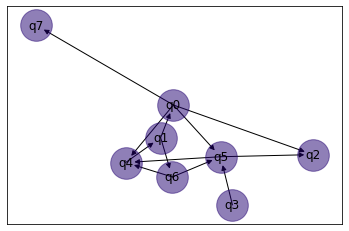

In [107]:
grafo=DrawGraph(parserWithList(sets))

In [108]:
eigencentral=nx.eigenvector_centrality(grafo)
katzcentral=nx.katz_centrality(grafo)
pgrank=nx.pagerank(grafo)
close=nx.closeness_centrality(grafo)



<BarContainer object of 8 artists>

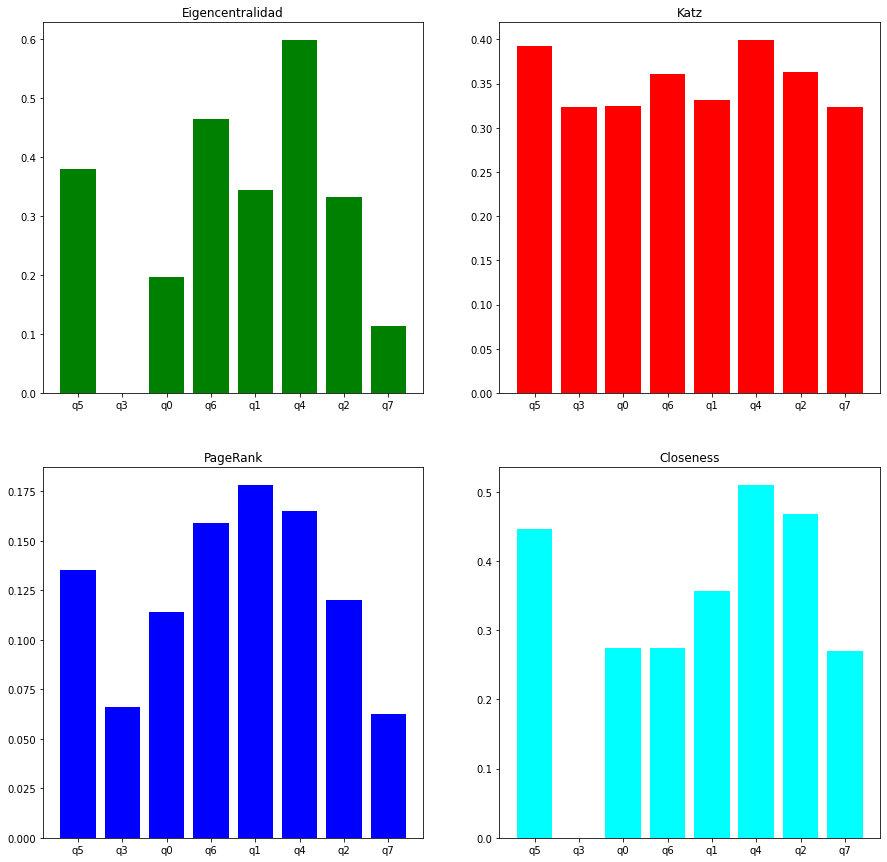

In [109]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title("Eigencentralidad")
plt.bar(list(eigencentral.keys()), eigencentral.values(), color='g')
plt.subplot(2,2,2)
plt.title("Katz")
plt.bar(list(katzcentral.keys()), katzcentral.values(), color='r')
plt.subplot(2,2,3)
plt.title("PageRank")
plt.bar(list(pgrank.keys()), pgrank.values(), color='b')
plt.subplot(2,2,4)
plt.title("Closeness")
plt.bar(list(close.keys()), close.values(), color='cyan')

